<a href="https://colab.research.google.com/github/IvanBaroni/projects-in-data/blob/main/Business_Case_in_Python_Ivan_Baroni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Business Case Study**

*by Ivan Baroni, June 2025*

Prompt:
Using attached dummy data, please perform an assessment of this business and prepare a set of meeting materials. Assume this business earns revenue through advertisements shown on a mobile video content platform.

# 0: Importing all libraries and dependencies

In [8]:
from google.colab import files
uploaded = files.upload()


Saving Business_Case_in_Python_Ivan_Baroni.ipynb to Business_Case_in_Python_Ivan_Baroni.ipynb


In [9]:
import os
os.listdir('/content')


['.config', 'Business_Case_in_Python_Ivan_Baroni.ipynb', 'sample_data']

In [13]:
import nbformat

path = 'Business_Case_in_Python_Ivan_Baroni.ipynb'

with open(path, encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# Clean metadata.widgets from each cell
for cell in nb['cells']:
    if 'metadata' in cell and 'widgets' in cell['metadata']:
        del cell['metadata']['widgets']

    # Also clean widget metadata from outputs
    if 'outputs' in cell:
        for output in cell['outputs']:
            if 'metadata' in output and 'widgets' in output['metadata']:
                del output['metadata']['widgets']

nbformat.write(nb, path)

print("✅ Deep-cleaned. You can now upload a fully GitHub-compatible version.")


✅ Deep-cleaned. You can now upload a fully GitHub-compatible version.


In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# For data manipulation
import pandas as pd

# For plotting
!pip install plotly --quiet
import plotly.express as px
import plotly.graph_objects as go


# For forecasting
!pip install prophet --quiet
from prophet import Prophet

# For Modeling
!pip install scikit-learn graphviz --quiet
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.preprocessing import OneHotEncoder
import graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
!pip install shap --quiet
import shap
!pip install xgboost --quiet
import xgboost as xgb

# To help order bar charts
from pandas.api.types import CategoricalDtype
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
region_order = ['One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine', 'Ten', 'Eleven', 'Twelve', 'Thirteen', 'Fourteen' ]
adplacement_order = ['Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon', 'Zeta' ]

# 1. Import and Evaluate the Data

In [ ]:
# Importing from .XLS and skipping the blank rows and columns
df = pd.read_excel('LATAM - Case_Study_Strategy.xls', skiprows=1)
df = df.iloc[:, 1:]
df

Date Ad Product Category Region Ad Placement Industry  \
0     2018-08-19                   A    One        Alpha        A   
1     2018-08-19                   A    Two         Beta        A   
2     2018-08-19                   A    Two        Alpha        A   
3     2018-08-19                   A    Two         Beta        B   
4     2018-08-19                   A    Two         Beta        A   
...          ...                 ...    ...          ...      ...   
65529 2019-05-03                   A    One         Beta        A   
65530 2019-05-03                   B   Four        Alpha        N   
65531 2019-05-03                   A   Four        Alpha        C   
65532 2019-05-03                   A    Two        Alpha        C   
65533 2019-05-03                   A    Two        Alpha        D   

       Impressions        CPM           Customer ID  Account ID  
0           346210   7.554104  67361976376639496192      2640.0  
1            39409   0.780620  62330521666629500928       143.0  
2           257531   9.542370   1633658946634319872      2218.0  
3             1757   1.858621  20851691626551500800       738.0  
4              468   2.637149  74007808106576396288      1066.0  
...            ...        ...                   ...         ...  
65529          320  20.786479  73513973891633397760      6777.0  
65530            0        NaN  89450014771636797440      9945.0  
65531            0        NaN  57179217986725601280     17080.0  
65532            0        NaN  34006118451632201728      7704.0  
65533            0        NaN  87629322296733007872     19725.0  

[65534 rows x 9 columns]

## 1.1 Checking dataset health

In [ ]:
# To learn about data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 65534 non-null  datetime64[ns]
 1   Ad Product Category  65534 non-null  object        
 2   Region               65534 non-null  object        
 3   Ad Placement         65534 non-null  object        
 4   Industry             65534 non-null  object        
 5   Impressions          65534 non-null  int64         
 6   CPM                  11018 non-null  float64       
 7   Customer ID          65534 non-null  object        
 8   Account ID           64076 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 4.5+ MB


In [ ]:
# Basic Statistics
df.describe()

Date   Impressions           CPM    Account ID
count                          65534  6.553400e+04  11018.000000  64076.000000
mean   2019-02-07 13:01:43.384502528  1.928662e+05      8.005518   7054.444020
min              2018-08-19 00:00:00  0.000000e+00      0.000000      0.000000
25%              2018-12-29 00:00:00  0.000000e+00      2.453330   3381.000000
50%              2019-02-23 00:00:00  0.000000e+00      4.294183   6777.000000
75%              2019-04-03 00:00:00  0.000000e+00      8.644420  10157.000000
max              2019-05-03 00:00:00  2.905861e+07   1224.000000  20597.000000
std                              NaN  1.894809e+06     21.605744   4479.326902

In [ ]:
# Check unique values per column
for col in df.columns:
    unique_values = df[col].nunique()
    percentage_of_total = (unique_values / len(df)) * 100
    print(f"Column '{col}': {unique_values} unique values ({percentage_of_total:.2f}%)")

Column 'Date': 258 unique values (0.39%)
Column 'Ad Product Category': 3 unique values (0.00%)
Column 'Region': 14 unique values (0.02%)
Column 'Ad Placement': 6 unique values (0.01%)
Column 'Industry': 24 unique values (0.04%)
Column 'Impressions': 9075 unique values (13.85%)
Column 'CPM': 10632 unique values (16.22%)
Column 'Customer ID': 1380 unique values (2.11%)
Column 'Account ID': 1052 unique values (1.61%)


In [ ]:
# Check for duplicated rows
df.duplicated().sum()

np.int64(0)

In [ ]:
# Check for missing values
df.isnull().sum()

Date                       0
Ad Product Category        0
Region                     0
Ad Placement               0
Industry                   0
Impressions                0
CPM                    54516
Customer ID                0
Account ID              1458
dtype: int64

In [ ]:
# Grouping by date to check if we didnt lose data by the .xls cropping (after row 65536)
dfdatecount = df.groupby('Date')[['Date']].count()

fig = px.line(dfdatecount, y='Date', title='Date Rows by Date')
fig.show()

In [ ]:
# The abrupt dip on the last day suggest data loss. To be safe, we'll be excluding every row for 2019-05-03
df = df[df['Date'] != '2019-05-03']
df

Date Ad Product Category Region Ad Placement Industry  \
0     2018-08-19                   A    One        Alpha        A   
1     2018-08-19                   A    Two         Beta        A   
2     2018-08-19                   A    Two        Alpha        A   
3     2018-08-19                   A    Two         Beta        B   
4     2018-08-19                   A    Two         Beta        A   
...          ...                 ...    ...          ...      ...   
65257 2019-05-02                   A    Two        Alpha        N   
65258 2019-05-02                   A    Two        Alpha        N   
65259 2019-05-02                   A    Two         Beta        N   
65260 2019-05-02                   A  Eight        Alpha        A   
65261 2019-05-02                   A    Two         Beta        A   

       Impressions       CPM           Customer ID  Account ID  
0           346210  7.554104  67361976376639496192      2640.0  
1            39409  0.780620  62330521666629500928       143.0  
2           257531  9.542370   1633658946634319872      2218.0  
3             1757  1.858621  20851691626551500800       738.0  
4              468  2.637149  74007808106576396288      1066.0  
...            ...       ...                   ...         ...  
65257            0       NaN  .63675E+151.63675E+1     11148.0  
65258            0       NaN  27055145011641298944     17065.0  
65259            0       NaN  27321702461637898240     12204.0  
65260            0       NaN  24071116861640601600     16246.0  
65261            0       NaN  87497646141632806912      8885.0  

[65262 rows x 9 columns]

In [ ]:
# To check the new Max for Date
df.describe()

Date   Impressions           CPM    Account ID
count                          65262  6.526200e+04  11005.000000  63809.000000
mean   2019-02-07 04:34:50.429346304  1.931147e+05      7.992873   7042.559278
min              2018-08-19 00:00:00  0.000000e+00      0.000000      0.000000
25%              2018-12-29 00:00:00  0.000000e+00      2.452826   3381.000000
50%              2019-02-22 00:00:00  0.000000e+00      4.289849   6777.000000
75%              2019-04-03 00:00:00  0.000000e+00      8.623654  10060.000000
max              2019-05-02 00:00:00  2.905861e+07   1224.000000  20597.000000
std                              NaN  1.896449e+06     21.612292   4470.567335

## 1.2. Feature Engineering

In [ ]:
# Adding COST based on Impressions and CPM
df['Cost'] = (df['Impressions'] * df['CPM']) / 1000

# Creating WEEKDAY from Date
df['Weekday'] = df['Date'].dt.day_name()

# Creating Week.
# Finding the start date
start_date = df['Date'].min()
# Calculating the week number based on the number of days from the start date
df['Week'] = (df['Date'] - start_date).dt.days // 7 + 1

df

Date Ad Product Category Region Ad Placement Industry  \
0     2018-08-19                   A    One        Alpha        A   
1     2018-08-19                   A    Two         Beta        A   
2     2018-08-19                   A    Two        Alpha        A   
3     2018-08-19                   A    Two         Beta        B   
4     2018-08-19                   A    Two         Beta        A   
...          ...                 ...    ...          ...      ...   
65257 2019-05-02                   A    Two        Alpha        N   
65258 2019-05-02                   A    Two        Alpha        N   
65259 2019-05-02                   A    Two         Beta        N   
65260 2019-05-02                   A  Eight        Alpha        A   
65261 2019-05-02                   A    Two         Beta        A   

       Impressions       CPM           Customer ID  Account ID         Cost  \
0           346210  7.554104  67361976376639496192      2640.0  2615.306470   
1            39409  0.780620  62330521666629500928       143.0    30.763442   
2           257531  9.542370   1633658946634319872      2218.0  2457.456043   
3             1757  1.858621  20851691626551500800       738.0     3.265597   
4              468  2.637149  74007808106576396288      1066.0     1.234186   
...            ...       ...                   ...         ...          ...   
65257            0       NaN  .63675E+151.63675E+1     11148.0          NaN   
65258            0       NaN  27055145011641298944     17065.0          NaN   
65259            0       NaN  27321702461637898240     12204.0          NaN   
65260            0       NaN  24071116861640601600     16246.0          NaN   
65261            0       NaN  87497646141632806912      8885.0          NaN   

        Weekday  Week  
0        Sunday     1  
1        Sunday     1  
2        Sunday     1  
3        Sunday     1  
4        Sunday     1  
...         ...   ...  
65257  Thursday    37  
65258  Thursday    37  
65259  Thursday    37  
65260  Thursday    37  
65261  Thursday    37  

[65262 rows x 12 columns]

# 2. Plotting the Data

## 2.1 Main metrics by Date

In [ ]:
# Charts by Date

dfdate = df.groupby('Date')[['Cost', 'Impressions', 'CPM']].sum()

dfdate['CPM_calc'] = (dfdate['Cost'] / dfdate['Impressions']) * 1000

fig = px.line(dfdate, y='CPM_calc', title='<b>• Calculated CPM Over Time</b>')
fig.update_traces(line=dict(width=3, color='red'))
fig.update_layout(
    title_font_size=20, title_font_color='red',
    xaxis_title='Date', yaxis_title='Calculated CPM',
    width=1200, height=400)
fig.show()


fig = px.line(dfdate, y='Impressions', title='<b>• Impressions Over Time</b>')
fig.update_traces(line=dict(width=3, color='blue'))
fig.update_layout(
    title_font_size=20, title_font_color='blue',
    xaxis_title='Date', yaxis_title='Impressions',
    width=1200, height=400)
fig.show()


fig = px.line(dfdate, y='Cost', title='<b>• Cost Over Time</b>')
fig.update_traces(line=dict(width=3, color='green'))
fig.update_layout(
    title_font_size=20, title_font_color='green',
    xaxis_title='Date', yaxis_title='Cost',
    width=1200, height=400)
fig.show()

## 2.2 Group by Features - Box Plot

In [ ]:
#  Create a dataframe grouped by Weekday
data = df.groupby('Weekday')[['Cost', 'Impressions']].sum().reset_index()
data['CPM_calc'] = (data['Cost'] / data['Impressions']) * 1000
data['avg_Impressions'] = df.groupby('Weekday')['Impressions'].mean().reset_index(drop=True)
data['avg_Cost'] = df.groupby('Weekday')['Cost'].mean().reset_index(drop=True)


# Order by Weekday
data['Weekday'] = data['Weekday'].astype(CategoricalDtype(categories=weekday_order, ordered=True))
data = data.sort_values('Weekday')


# CPM bar chart
fig = px.bar(data, x='Weekday', y='CPM_calc',
             title='<b>• Calculated CPM by Weekday</b>',
             text=data['CPM_calc'].apply(lambda x: f"<b>${x:,.2f}</b>"),
             color_discrete_sequence=['red'])
fig.update_layout( title_font_size=20, title_font_color='red',
    yaxis=dict(showticklabels=False,),
    xaxis_title=None, yaxis_title='CPM',
    width=1200, height=450)
fig.update_traces(textposition='inside', textfont_size=20)
fig.update_xaxes(tickfont=dict(size=18))
fig.show()


# Average Impresions bar chart
fig = px.bar(data, x='Weekday', y='avg_Impressions',
             title='<b>• Average Impressions by Weekday</b>',
             text=data['avg_Impressions'].apply(lambda x: f"<b>{x/1000:,.1f} k</b>"),
             color_discrete_sequence=['blue'])
fig.update_layout( title_font_size=20, title_font_color='blue',
    yaxis=dict(showticklabels=False,),
    xaxis_title=None, yaxis_title='Avg Impressions',
    width=1200, height=450)
fig.update_traces(textposition='inside', textfont_size=20)
fig.update_xaxes(tickfont=dict(size=18))
fig.show()


# Average Cost bar chart
fig = px.bar(data, x='Weekday', y='avg_Cost',
             title='<b>• Average Cost by Weekday</b>',
             text=data['avg_Cost'].apply(lambda x: f"<b>${x:,.0f} </b>"),
             color_discrete_sequence=['green'])
fig.update_layout( title_font_size=20, title_font_color='green',
    yaxis=dict(showticklabels=False,),
    xaxis_title=None, yaxis_title='Avg Cost',
    width=1200, height=450)
fig.update_traces(textposition='inside', textfont_size=20)
fig.update_xaxes(tickfont=dict(size=18))
fig.show()

In [ ]:
#  Create a dataframe grouped by Ad Product Category
data = df.groupby('Ad Product Category')[['Cost', 'Impressions']].sum().reset_index()
data['CPM_calc'] = (data['Cost'] / data['Impressions']) * 1000
data['avg_Impressions'] = df.groupby('Ad Product Category')['Impressions'].mean().reset_index(drop=True)
data['avg_Cost'] = df.groupby('Ad Product Category')['Cost'].mean().reset_index(drop=True)


# CPM bar chart
fig = px.bar(data, x='Ad Product Category', y='CPM_calc',
             title='<b>• Calculated CPM by Ad Product Category</b>',
             text=data['CPM_calc'].apply(lambda x: f"<b>${x:,.2f}</b>"),
             color_discrete_sequence=['red'])
fig.update_layout( title_font_size=20, title_font_color='red',
    yaxis=dict(showticklabels=False,),
    xaxis_title=None, yaxis_title='CPM',
    width=700, height=450)
fig.update_traces(textposition='inside', textfont_size=20)
fig.update_xaxes(tickfont=dict(size=18))
fig.show()


# Impresions bar chart
fig = px.bar(data, x='Ad Product Category', y='Impressions',
             title='<b>• Impressions by Ad Product Category</b>',
             text=data['Impressions'].apply(lambda x: f"<b>{x/1000000000:,.2f} B</b>"),
             color_discrete_sequence=['blue'])
fig.update_layout( title_font_size=20, title_font_color='blue',
    yaxis=dict(showticklabels=False,),
    xaxis_title=None, yaxis_title='Impressions',
    width=700, height=450)
fig.update_traces(textposition='inside', textfont_size=20)
fig.update_xaxes(tickfont=dict(size=18))
fig.show()


# Cost bar chart
fig = px.bar(data, x='Ad Product Category', y='Cost',
             title='<b>• Cost by Ad Product Category</b>',
             text=data['Cost'].apply(lambda x: f"<b>${x/1000000:,.1f} M</b>"),
             color_discrete_sequence=['green'])
fig.update_layout( title_font_size=20, title_font_color='green',
    yaxis=dict(showticklabels=False,),
    xaxis_title=None, yaxis_title='Cost',
    width=700, height=450)
fig.update_traces(textposition='inside', textfont_size=20)
fig.update_xaxes(tickfont=dict(size=18))
fig.show()

In [ ]:
#  Create a dataframe grouped by Region
data = df.groupby('Region')[['Cost', 'Impressions']].sum().reset_index()
data['CPM_calc'] = (data['Cost'] / data['Impressions']) * 1000
data['avg_Impressions'] = df.groupby('Region')['Impressions'].mean().reset_index(drop=True)
data['avg_Cost'] = df.groupby('Region')['Cost'].mean().reset_index(drop=True)


# Order by Weekday
data['Region'] = data['Region'].astype(CategoricalDtype(categories=region_order, ordered=True))
data = data.sort_values('Region')


# CPM bar chart
fig = px.bar(data, x='Region', y='CPM_calc',
             title='<b>• Calculated CPM by Region</b>',
             text=data['CPM_calc'].apply(lambda x: f"<b>${x:,.2f}</b>"),
             color_discrete_sequence=['red'])
fig.update_layout( title_font_size=20, title_font_color='red',
    yaxis=dict(showticklabels=False,),
    xaxis_title=None, yaxis_title='CPM',
    width=1500, height=500)
fig.update_traces(textposition='outside', textfont_size=14)
fig.update_xaxes(tickfont=dict(size=15))
fig.show()


# Impresions bar chart
fig = px.bar(data, x='Region', y='Impressions',
             title='<b>• Impressions by Region</b>',
             text=data['Impressions'].apply(lambda x: f"<b>{x/1000000:,.1f} M</b>"),
             color_discrete_sequence=['blue'])
fig.update_layout( title_font_size=20, title_font_color='blue',
    yaxis=dict(showticklabels=False,),
    xaxis_title=None, yaxis_title='Impressions',
    width=1500, height=500)
fig.update_traces(textposition='outside', textfont_size=14)
fig.update_xaxes(tickfont=dict(size=15))
fig.show()


# Cost bar chart
fig = px.bar(data, x='Region', y='Cost',
             title='<b>• Average Cost by Region</b>',
             text=data['Cost'].apply(lambda x: f"<b>${x/1000:,.0f} k</b>"),
             color_discrete_sequence=['green'])
fig.update_layout( title_font_size=20, title_font_color='green',
    yaxis=dict(showticklabels=False,),
    xaxis_title=None, yaxis_title='Cost',
    width=1500, height=500)
fig.update_traces(textposition='outside', textfont_size=14)
fig.update_xaxes(tickfont=dict(size=15))
fig.show()

In [ ]:
#  Create a dataframe grouped by Ad Placement
data = df.groupby('Ad Placement')[['Cost', 'Impressions']].sum().reset_index()
data['CPM_calc'] = (data['Cost'] / data['Impressions']) * 1000
data['avg_Impressions'] = df.groupby('Ad Placement')['Impressions'].mean().reset_index(drop=True)
data['avg_Cost'] = df.groupby('Ad Placement')['Cost'].mean().reset_index(drop=True)


# Order by Weekday
data['Ad Placement'] = data['Ad Placement'].astype(CategoricalDtype(categories=adplacement_order, ordered=True))
data = data.sort_values('Ad Placement')


# CPM bar chart
fig = px.bar(data, x='Ad Placement', y='CPM_calc',
             title='<b>• Calculated CPM by Ad Placement</b>',
             text=data['CPM_calc'].apply(lambda x: f"<b>${x:,.2f}</b>"),
             color_discrete_sequence=['red'])
fig.update_layout( title_font_size=20, title_font_color='red',
    yaxis=dict(showticklabels=False,),
    xaxis_title=None, yaxis_title='CPM',
    width=800, height=500)
fig.update_traces(textposition='outside', textfont_size=14)
fig.update_xaxes(tickfont=dict(size=15))
fig.show()


# Impresions bar chart
fig = px.bar(data, x='Ad Placement', y='Impressions',
             title='<b>• Impressions by Ad Placement</b>',
             text=data['Impressions'].apply(lambda x: f"<b>{x/1000000000:,.2f} B</b>"),
             color_discrete_sequence=['blue'])
fig.update_layout( title_font_size=20, title_font_color='blue',
    yaxis=dict(showticklabels=False,),
    xaxis_title=None, yaxis_title='Impressions',
    width=800, height=500)
fig.update_traces(textposition='outside', textfont_size=14)
fig.update_xaxes(tickfont=dict(size=15))
fig.show()


# Cost bar chart
fig = px.bar(data, x='Ad Placement', y='Cost',
             title='<b>• Cost by Ad Placement</b>',
             text=data['Cost'].apply(lambda x: f"<b>${x/1000000:,.2f} M</b>"),
             color_discrete_sequence=['green'])
fig.update_layout( title_font_size=20, title_font_color='green',
    yaxis=dict(showticklabels=False,),
    xaxis_title=None, yaxis_title='Cost',
    width=800, height=500)
fig.update_traces(textposition='outside', textfont_size=14)
fig.update_xaxes(tickfont=dict(size=15))
fig.show()

In [ ]:
#  Create a dataframe grouped by Industry
data = df.groupby('Industry')[['Cost', 'Impressions']].sum().reset_index()
data['CPM_calc'] = (data['Cost'] / data['Impressions']) * 1000
data['avg_Impressions'] = df.groupby('Industry')['Impressions'].mean().reset_index(drop=True)
data['avg_Cost'] = df.groupby('Industry')['Cost'].mean().reset_index(drop=True)



# CPM bar chart
fig = px.bar(data, x='Industry', y='CPM_calc',
             title='<b>• Calculated CPM by Industry</b>',
             text=data['CPM_calc'].apply(lambda x: f"<b>${x:,.2f}</b>"),
             color_discrete_sequence=['red'])
fig.update_layout( title_font_size=20, title_font_color='red',
    yaxis=dict(showticklabels=False,),
    xaxis_title=None, yaxis_title='CPM',
    width=1800, height=500)
fig.update_traces(textposition='outside', textfont_size=12)
fig.update_xaxes(tickfont=dict(size=15))
fig.show()


# Impresions bar chart
fig = px.bar(data, x='Industry', y='Impressions',
             title='<b>• Impressions by Industry</b>',
             text=data['Impressions'].apply(lambda x: f"<b>{x/1000000:,.1f} M</b>"),
             color_discrete_sequence=['blue'])
fig.update_layout( title_font_size=20, title_font_color='blue',
    yaxis=dict(showticklabels=False,),
    xaxis_title=None, yaxis_title='Impressions',
    width=1800, height=500)
fig.update_traces(textposition='outside', textfont_size=12)
fig.update_xaxes(tickfont=dict(size=15))
fig.show()


# Average Cost bar chart
fig = px.bar(data, x='Industry', y='Cost',
             title='<b>• Cost by Industry</b>',
             text=data['Cost'].apply(lambda x: f"<b>${x/1000:,.0f} k</b>"),
             color_discrete_sequence=['green'])
fig.update_layout( title_font_size=20, title_font_color='green',
    yaxis=dict(showticklabels=False,),
    xaxis_title=None, yaxis_title='Cost',
    width=1800, height=500)
fig.update_traces(textposition='outside', textfont_size=12)
fig.update_xaxes(tickfont=dict(size=15))
fig.show()

# 3. Weekly Evolution

In [ ]:
# Group by Week and Ad Product Category
dfweek_adproductcategory = df.groupby(['Week', 'Ad Product Category'])[['Cost', 'Impressions']].sum().reset_index()
dfweek_adproductcategory['CPM_calc'] = (dfweek_adproductcategory['Cost'] / dfweek_adproductcategory['Impressions']) * 1000

# Plot the chart - Impressions
fig = px.line(dfweek_adproductcategory, x='Week', y='Impressions', color='Ad Product Category',
              title='<b>• Impressions by Week and Ad Product Category</b>')
fig.update_traces(line=dict(width=3))
fig.update_layout(
    xaxis_title='Week',
    yaxis_title='Total Impressions',
    width=1000,
    height=500
)
fig.show()

# Plot the chart - Cost
fig = px.line(dfweek_adproductcategory, x='Week', y='Cost', color='Ad Product Category',
              title='<b>• Cost by Week and Ad Product Category</b>')
fig.update_traces(line=dict(width=3))
fig.update_layout(
    xaxis_title='Week',
    yaxis_title='Total Cost',
    width=1000,
    height=500
)
fig.show()

In [ ]:
# Group by Week and Region
dfweek_region = df.groupby(['Week', 'Region'])[['Cost', 'Impressions']].sum().reset_index()
dfweek_region['CPM_calc'] = (dfweek_region['Cost'] / dfweek_region['Impressions']) * 1000


# Plot the chart - Impressions
fig = px.line(dfweek_region, x='Week', y='Impressions', color='Region',
              title='<b>• Impressions by Week and Region</b>')
fig.update_traces(line=dict(width=3))
fig.update_layout(
    xaxis_title='Week',
    yaxis_title='Total Impressions',
    width=1000,
    height=500
)
fig.show()


# Plot the chart - Cost
fig = px.line(dfweek_region, x='Week', y='Cost', color='Region',
              title='<b>• Cost by Week and Region</b>')
fig.update_traces(line=dict(width=3))
fig.update_layout(
    xaxis_title='Week',
    yaxis_title='Total Cost',
    width=1000,
    height=500
)
fig.show()

In [ ]:
# Group by Week and Ad Placement
dfweek_adplacement = df.groupby(['Week', 'Ad Placement'])[['Cost', 'Impressions']].sum().reset_index()
dfweek_adplacement['CPM_calc'] = (dfweek_adplacement['Cost'] / dfweek_adplacement['Impressions']) * 1000

# Plot the chart - Impressions
fig = px.line(dfweek_adplacement, x='Week', y='Impressions', color='Ad Placement',
              title='<b>• Impressions by Week and Ad Placement</b>')
fig.update_traces(line=dict(width=3))
fig.update_layout(
    xaxis_title='Week',
    yaxis_title='Total Impressions',
    width=1000,
    height=500
)
fig.show()


# Plot the chart - Cost
fig = px.line(dfweek_adplacement, x='Week', y='Cost', color='Ad Placement',
              title='<b>• Cost by Week and Ad Placement</b>')
fig.update_traces(line=dict(width=3))
fig.update_layout(
    xaxis_title='Week',
    yaxis_title='Total Cost',
    width=1000,
    height=500
)
fig.show()

In [ ]:
# Group by Week and Industry
dfweek_industry = df.groupby(['Week', 'Industry'])[['Cost', 'Impressions']].sum().reset_index()
dfweek_industry['CPM_calc'] = (dfweek_industry['Cost'] / dfweek_industry['Impressions']) * 1000

# Plot the chart - Impressions
fig = px.line(dfweek_industry, x='Week', y='Impressions', color='Industry',
              title='<b>• Impressions by Week and Industry</b>')
fig.update_traces(line=dict(width=3))
fig.update_layout(
    xaxis_title='Week',
    yaxis_title='Total Impressions',
    width=1000,
    height=500
)
fig.show()


# Plot the chart - Cost
fig = px.line(dfweek_industry, x='Week', y='Cost', color='Industry',
              title='<b>• Cost by Week and Industry</b>')
fig.update_traces(line=dict(width=3))
fig.update_layout(
    xaxis_title='Week',
    yaxis_title='Total Cost',
    width=1000,
    height=500
)
fig.show()

# 4. Forecasting

In [ ]:
# Prepare the data for Prophet
prophet_df = dfdate.reset_index()[['Date', 'Cost']]
prophet_df.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create a future dataframe for forecasting
future = model.make_future_dataframe(periods=90)

# Make predictions
forecast = model.predict(future)

# Create the base plot with actual Cost data
fig = go.Figure()

# Add the actual Cost line
fig.add_trace(go.Scatter(x=dfdate.index, y=dfdate['Cost'], mode='lines', name='Actual Cost',
                         line=dict(color='green', width=2)))

# Add the forecast line from 2019-05-03 onwards
fig.add_trace(go.Scatter(x=forecast[forecast['ds'] >= '2019-05-03']['ds'],
                         y=forecast[forecast['ds'] >= '2019-05-03']['yhat'],
                         mode='lines', name='Forecast',
                         line=dict(color='green', width=2, dash='dash')))


fig.update_layout(
    title='<b>• Cost and Forecast Over Time</b>',
    title_font_size=20,
    title_font_color='green',
    xaxis_title='Date',
    yaxis_title='Cost',
    width=800,
    height=450,
    showlegend=True
)

fig.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0g6i0cxk/rplowa2d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0g6i0cxk/ppbnhujf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98012', 'data', 'file=/tmp/tmp0g6i0cxk/rplowa2d.json', 'init=/tmp/tmp0g6i0cxk/ppbnhujf.json', 'output', 'file=/tmp/tmp0g6i0cxk/prophet_models3te5rk_/prophet_model-20250608181313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:13:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:13:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Prepare the data for Prophet
prophet_df = dfdate.reset_index()[['Date', 'Impressions']]
prophet_df.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create a future dataframe for forecasting
future = model.make_future_dataframe(periods=90)

# Make predictions
forecast = model.predict(future)

# Create the base plot with actual Impressions data
fig = go.Figure()

# Add the actual Impressions line
fig.add_trace(go.Scatter(x=dfdate.index, y=dfdate['Impressions'], mode='lines', name='Actual Impressions',
                         line=dict(color='blue', width=2)))

# Add the forecast line from 2019-05-03 onwards
fig.add_trace(go.Scatter(x=forecast[forecast['ds'] >= '2019-05-03']['ds'],
                         y=forecast[forecast['ds'] >= '2019-05-03']['yhat'],
                         mode='lines', name='Forecast',
                         line=dict(color='blue', width=2, dash='dash')))


fig.update_layout(
    title='<b>• Impressions and Forecast Over Time</b>',
    title_font_size=20,
    title_font_color='blue',
    xaxis_title='Date',
    yaxis_title='Impressions',
    width=800,
    height=450,
    showlegend=True
)

fig.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0g6i0cxk/4knli0be.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0g6i0cxk/3u__3bmo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3305', 'data', 'file=/tmp/tmp0g6i0cxk/4knli0be.json', 'init=/tmp/tmp0g6i0cxk/3u__3bmo.json', 'output', 'file=/tmp/tmp0g6i0cxk/prophet_modeljsfghqe6/prophet_model-20250608181413.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:14:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:14:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Prepare the data for Prophet
prophet_df = dfdate.reset_index()[['Date', 'CPM_calc']]
prophet_df.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create a future dataframe for forecasting
future = model.make_future_dataframe(periods=90)

# Make predictions
forecast = model.predict(future)

# Create the base plot with actual CPM_calc data
fig = go.Figure()

# Add the actual CPM_calc line
fig.add_trace(go.Scatter(x=dfdate.index, y=dfdate['CPM_calc'], mode='lines', name='Actual CPM_calc',
                         line=dict(color='red', width=2)))

# Add the forecast line from 2019-05-03 onwards
fig.add_trace(go.Scatter(x=forecast[forecast['ds'] >= '2019-05-03']['ds'],
                         y=forecast[forecast['ds'] >= '2019-05-03']['yhat'],
                         mode='lines', name='Forecast',
                         line=dict(color='red', width=2, dash='dash')))


fig.update_layout(
    title='<b>• CPM_calc and Forecast Over Time</b>',
    title_font_size=20,
    title_font_color='red',
    xaxis_title='Date',
    yaxis_title='CPM_calc',
    width=800,
    height=450,
    showlegend=True
)

fig.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0g6i0cxk/q2r6py5m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0g6i0cxk/4s7bo95h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34795', 'data', 'file=/tmp/tmp0g6i0cxk/q2r6py5m.json', 'init=/tmp/tmp0g6i0cxk/4s7bo95h.json', 'output', 'file=/tmp/tmp0g6i0cxk/prophet_modelocuk1_wv/prophet_model-20250608181526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:15:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:15:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Interesting Trends: 'Ad Product Category'='A'
df_AdProdCategory_A = df[df['Ad Product Category'] == 'A'].groupby('Date')[['Cost', 'Impressions', 'CPM']].sum()
df_AdProdCategory_A['CPM_calc'] = (df_AdProdCategory_A['Cost'] / df_AdProdCategory_A['Impressions']) * 1000


dftemp = df_AdProdCategory_A

# Prepare the data for Prophet
prophet_df = dftemp.reset_index()[['Date', 'Cost']]
prophet_df.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create a future dataframe for forecasting
future = model.make_future_dataframe(periods=90)

# Make predictions
forecast = model.predict(future)

# Create the base plot with actual Cost data
fig = go.Figure()

# Add the actual Cost line
fig.add_trace(go.Scatter(x=dftemp.index, y=dftemp['Cost'], mode='lines', name='Actual Cost',
                         line=dict(color='green', width=2)))

# Add the forecast line from 2019-05-03 onwards
fig.add_trace(go.Scatter(x=forecast[forecast['ds'] >= '2019-05-03']['ds'],
                         y=forecast[forecast['ds'] >= '2019-05-03']['yhat'],
                         mode='lines', name='Forecast',
                         line=dict(color='green', width=2, dash='dash')))


fig.update_layout(
    title='<b>• Cost and Forecast Over Time for "Ad Product Category = A"</b>',
    title_font_size=20,
    title_font_color='green',
    xaxis_title='Date',
    yaxis_title='Cost',
    width=1500,
    height=700,
    showlegend=True
)

fig.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0g6i0cxk/73pn26pp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0g6i0cxk/054om6yg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46141', 'data', 'file=/tmp/tmp0g6i0cxk/73pn26pp.json', 'init=/tmp/tmp0g6i0cxk/054om6yg.json', 'output', 'file=/tmp/tmp0g6i0cxk/prophet_modellgt814uj/prophet_model-20250608153339.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:33:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:33:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Interesting Trends: 'Region'='ONE'
df_Region_One = df[df['Region'] == 'One'].groupby('Date')[['Cost', 'Impressions', 'CPM']].sum()
df_Region_One['CPM_calc'] = (df_Region_One['Cost'] / df_Region_One['Impressions']) * 1000


dftemp = df_Region_One

# Prepare the data for Prophet
prophet_df = dftemp.reset_index()[['Date', 'Cost']]
prophet_df.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create a future dataframe for forecasting
future = model.make_future_dataframe(periods=90)

# Make predictions
forecast = model.predict(future)

# Create the base plot with actual Cost data
fig = go.Figure()

# Add the actual Cost line
fig.add_trace(go.Scatter(x=dftemp.index, y=dftemp['Cost'], mode='lines', name='Actual Cost',
                         line=dict(color='green', width=2)))

# Add the forecast line from 2019-05-03 onwards
fig.add_trace(go.Scatter(x=forecast[forecast['ds'] >= '2019-05-03']['ds'],
                         y=forecast[forecast['ds'] >= '2019-05-03']['yhat'],
                         mode='lines', name='Forecast',
                         line=dict(color='green', width=2, dash='dash')))


fig.update_layout(
    title='<b>• Cost and Forecast Over Time for "Region = One"</b>',
    title_font_size=20,
    title_font_color='green',
    xaxis_title='Date',
    yaxis_title='Cost',
    width=1500,
    height=700,
    showlegend=True
)

fig.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0g6i0cxk/fldvyk2_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0g6i0cxk/6_oxcklv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45075', 'data', 'file=/tmp/tmp0g6i0cxk/fldvyk2_.json', 'init=/tmp/tmp0g6i0cxk/6_oxcklv.json', 'output', 'file=/tmp/tmp0g6i0cxk/prophet_modelanbyp9vl/prophet_model-20250608153345.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:33:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:33:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Interesting Trends: 'Region'='TWO'
df_Region_Two = df[df['Region'] == 'Two'].groupby('Date')[['Cost', 'Impressions', 'CPM']].sum()
df_Region_Two['CPM_calc'] = (df_Region_Two['Cost'] / df_Region_Two['Impressions']) * 1000


dftemp = df_Region_Two

# Prepare the data for Prophet
prophet_df = dftemp.reset_index()[['Date', 'Cost']]
prophet_df.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create a future dataframe for forecasting
future = model.make_future_dataframe(periods=90)

# Make predictions
forecast = model.predict(future)

# Create the base plot with actual Cost data
fig = go.Figure()

# Add the actual Cost line
fig.add_trace(go.Scatter(x=dftemp.index, y=dftemp['Cost'], mode='lines', name='Actual Cost',
                         line=dict(color='green', width=2)))

# Add the forecast line from 2019-05-03 onwards
fig.add_trace(go.Scatter(x=forecast[forecast['ds'] >= '2019-05-03']['ds'],
                         y=forecast[forecast['ds'] >= '2019-05-03']['yhat'],
                         mode='lines', name='Forecast',
                         line=dict(color='green', width=2, dash='dash')))


fig.update_layout(
    title='<b>• Cost and Forecast Over Time for "Region = Two"</b>',
    title_font_size=20,
    title_font_color='green',
    xaxis_title='Date',
    yaxis_title='Cost',
    width=1500,
    height=700,
    showlegend=True
)

fig.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0g6i0cxk/t94at3gk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0g6i0cxk/cfbrwfuu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60901', 'data', 'file=/tmp/tmp0g6i0cxk/t94at3gk.json', 'init=/tmp/tmp0g6i0cxk/cfbrwfuu.json', 'output', 'file=/tmp/tmp0g6i0cxk/prophet_modeliwuu6_4a/prophet_model-20250608153351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:33:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:33:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Interesting Trends: 'Region'='FOUR'
df_Region_Four = df[df['Region'] == 'Four'].groupby('Date')[['Cost', 'Impressions', 'CPM']].sum()
df_Region_Four['CPM_calc'] = (df_Region_Four['Cost'] / df_Region_Four['Impressions']) * 1000


dftemp = df_Region_Four

# Prepare the data for Prophet
prophet_df = dftemp.reset_index()[['Date', 'Cost']]
prophet_df.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create a future dataframe for forecasting
future = model.make_future_dataframe(periods=90)

# Make predictions
forecast = model.predict(future)

# Create the base plot with actual Cost data
fig = go.Figure()

# Add the actual Cost line
fig.add_trace(go.Scatter(x=dftemp.index, y=dftemp['Cost'], mode='lines', name='Actual Cost',
                         line=dict(color='green', width=2)))

# Add the forecast line from 2019-05-03 onwards
fig.add_trace(go.Scatter(x=forecast[forecast['ds'] >= '2019-05-03']['ds'],
                         y=forecast[forecast['ds'] >= '2019-05-03']['yhat'],
                         mode='lines', name='Forecast',
                         line=dict(color='green', width=2, dash='dash')))


fig.update_layout(
    title='<b>• Cost and Forecast Over Time for "Region = Four"</b>',
    title_font_size=20,
    title_font_color='green',
    xaxis_title='Date',
    yaxis_title='Cost',
    width=1500,
    height=700,
    showlegend=True
)

fig.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0g6i0cxk/78skatvb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0g6i0cxk/zi0_32hs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80765', 'data', 'file=/tmp/tmp0g6i0cxk/78skatvb.json', 'init=/tmp/tmp0g6i0cxk/zi0_32hs.json', 'output', 'file=/tmp/tmp0g6i0cxk/prophet_model_tipr7_7/prophet_model-20250608153357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:33:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:33:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Interesting Trends: 'Ad Placement'='Beta'
df_AdPlacement_Beta = df[df['Ad Placement'] == 'Beta'].groupby('Date')[['Cost', 'Impressions', 'CPM']].sum()
df_AdPlacement_Beta['CPM_calc'] = (df_AdPlacement_Beta['Cost'] / df_AdPlacement_Beta['Impressions']) * 1000


dftemp = df_AdPlacement_Beta

# Prepare the data for Prophet
prophet_df = dftemp.reset_index()[['Date', 'Cost']]
prophet_df.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create a future dataframe for forecasting
future = model.make_future_dataframe(periods=90)

# Make predictions
forecast = model.predict(future)

# Create the base plot with actual Cost data
fig = go.Figure()

# Add the actual Cost line
fig.add_trace(go.Scatter(x=dftemp.index, y=dftemp['Cost'], mode='lines', name='Actual Cost',
                         line=dict(color='green', width=2)))

# Add the forecast line from 2019-05-03 onwards
fig.add_trace(go.Scatter(x=forecast[forecast['ds'] >= '2019-05-03']['ds'],
                         y=forecast[forecast['ds'] >= '2019-05-03']['yhat'],
                         mode='lines', name='Forecast',
                         line=dict(color='green', width=2, dash='dash')))


fig.update_layout(
    title='<b>• Cost and Forecast Over Time for "Ad Placement = Beta"</b>',
    title_font_size=20,
    title_font_color='green',
    xaxis_title='Date',
    yaxis_title='Cost',
    width=1500,
    height=700,
    showlegend=True
)

fig.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0g6i0cxk/ghazzwg6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0g6i0cxk/_698_lsa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4367', 'data', 'file=/tmp/tmp0g6i0cxk/ghazzwg6.json', 'init=/tmp/tmp0g6i0cxk/_698_lsa.json', 'output', 'file=/tmp/tmp0g6i0cxk/prophet_modelwt75syym/prophet_model-20250608153407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:34:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:34:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Interesting Trends: 'Industry'='A'
df_Industry_A = df[df['Industry'] == 'A'].groupby('Date')[['Cost', 'Impressions', 'CPM']].sum()
df_Industry_A['CPM_calc'] = (df_Industry_A['Cost'] / df_Industry_A['Impressions']) * 1000


dftemp = df_Industry_A

# Prepare the data for Prophet
prophet_df = dftemp.reset_index()[['Date', 'Cost']]
prophet_df.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create a future dataframe for forecasting
future = model.make_future_dataframe(periods=90)

# Make predictions
forecast = model.predict(future)

# Create the base plot with actual Cost data
fig = go.Figure()

# Add the actual Cost line
fig.add_trace(go.Scatter(x=dftemp.index, y=dftemp['Cost'], mode='lines', name='Actual Cost',
                         line=dict(color='green', width=2)))

# Add the forecast line from 2019-05-03 onwards
fig.add_trace(go.Scatter(x=forecast[forecast['ds'] >= '2019-05-03']['ds'],
                         y=forecast[forecast['ds'] >= '2019-05-03']['yhat'],
                         mode='lines', name='Forecast',
                         line=dict(color='green', width=2, dash='dash')))


fig.update_layout(
    title='<b>• Cost and Forecast Over Time for "Industry = A"</b>',
    title_font_size=20,
    title_font_color='green',
    xaxis_title='Date',
    yaxis_title='Cost',
    width=1500,
    height=700,
    showlegend=True
)

fig.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0g6i0cxk/_1sbubvd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0g6i0cxk/n5r5bkoe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76008', 'data', 'file=/tmp/tmp0g6i0cxk/_1sbubvd.json', 'init=/tmp/tmp0g6i0cxk/n5r5bkoe.json', 'output', 'file=/tmp/tmp0g6i0cxk/prophet_modelon1iqjii/prophet_model-20250608153414.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:34:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:34:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Interesting Trends: 'Industry'='B'
df_Industry_B = df[df['Industry'] == 'B'].groupby('Date')[['Cost', 'Impressions', 'CPM']].sum()
df_Industry_B['CPM_calc'] = (df_Industry_B['Cost'] / df_Industry_B['Impressions']) * 1000


dftemp = df_Industry_B

# Prepare the data for Prophet
prophet_df = dftemp.reset_index()[['Date', 'Cost']]
prophet_df.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create a future dataframe for forecasting
future = model.make_future_dataframe(periods=90)

# Make predictions
forecast = model.predict(future)

# Create the base plot with actual Cost data
fig = go.Figure()

# Add the actual Cost line
fig.add_trace(go.Scatter(x=dftemp.index, y=dftemp['Cost'], mode='lines', name='Actual Cost',
                         line=dict(color='green', width=2)))

# Add the forecast line from 2019-05-03 onwards
fig.add_trace(go.Scatter(x=forecast[forecast['ds'] >= '2019-05-03']['ds'],
                         y=forecast[forecast['ds'] >= '2019-05-03']['yhat'],
                         mode='lines', name='Forecast',
                         line=dict(color='green', width=2, dash='dash')))


fig.update_layout(
    title='<b>• Cost and Forecast Over Time for "Industry = B"</b>',
    title_font_size=20,
    title_font_color='green',
    xaxis_title='Date',
    yaxis_title='Cost',
    width=1500,
    height=700,
    showlegend=True
)

fig.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0g6i0cxk/4l__bxb_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0g6i0cxk/nm8368gl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24568', 'data', 'file=/tmp/tmp0g6i0cxk/4l__bxb_.json', 'init=/tmp/tmp0g6i0cxk/nm8368gl.json', 'output', 'file=/tmp/tmp0g6i0cxk/prophet_model3y3zi7gp/prophet_model-20250608153521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:35:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:35:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# 5. ML Models

## 5.1 Decision Tree

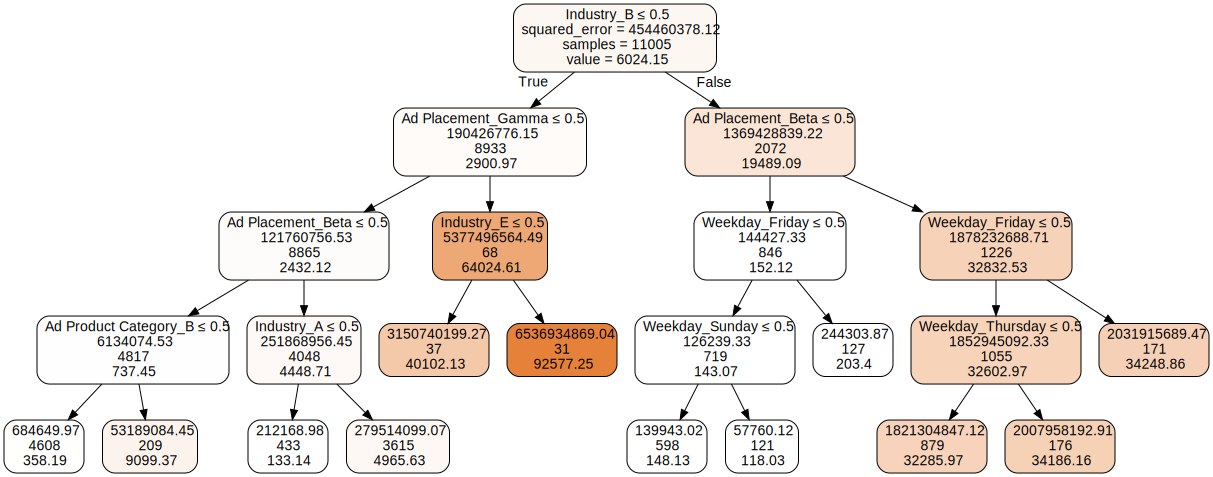

In [ ]:
# Select features and target
features = ['Weekday', 'Ad Product Category', 'Ad Placement', 'Industry']
target = 'Cost'

# Handle categorical features by one-hot encoding
X = df[features]
y = df[target]

# Drop rows with NaN in the target variable
df_cleaned = df.dropna(subset=[target])
X = df_cleaned[features]
y = df_cleaned[target]


encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X)

# Create and train the Decision Tree Regressor model
# You can adjust parameters like max_depth for better visualization or control complexity
model = DecisionTreeRegressor(max_depth=4, random_state=42, min_samples_leaf=30)
model.fit(X_encoded, y)

# Export the trained model to a Graphviz .dot file
dot_data = export_graphviz(model, out_file=None,
                           feature_names=encoder.get_feature_names_out(features),
                           filled=True, rounded=True,
                           label = 'root',
                           special_characters=True, precision=2)

# Create a Graphviz graph from the .dot data
graph = graphviz.Source(dot_data)

# Render the graph
graph

In [ ]:
# Predict on the training data
y_pred = model.predict(X_encoded)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Optional: Plot actual vs. predicted values
fig = go.Figure()

fig.add_trace(go.Scatter(x=y, y=y_pred, mode='markers', name='Actual vs. Predicted'))
fig.add_trace(go.Scatter(x=[y.min(), y.max()], y=[y.min(), y.max()], mode='lines', name='Ideal', line=dict(color='red', dash='dash')))

fig.update_layout(
    title='Actual vs. Predicted Cost (Decision Tree)',
    xaxis_title='Actual Cost',
    yaxis_title='Predicted Cost',
    showlegend=True
)
fig.show()

Mean Squared Error (MSE): 331298135.23
R-squared (R2): 0.27


## 5.2 Random Forest

In [ ]:
# Select features and target
features = ['Weekday', 'Ad Product Category', 'Ad Placement', 'Industry']
target = 'Cost'

# Handle categorical features by one-hot encoding
X = df[features]
y = df[target]

# Drop rows with NaN in the target variable
df_cleaned = df.dropna(subset=[target])
X = df_cleaned[features]
y = df_cleaned[target]

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X)

# Split data into training and testing sets (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and train the RandomForestRegressor model
# You can adjust parameters like n_estimators, max_depth, etc.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regressor Mean Squared Error: {mse:.2f}")
print(f"Random Forest Regressor R-squared: {r2:.2f}")

# You can also make predictions on the entire dataset if needed
# df['CPM_predicted_rf'] = rf_model.predict(X_encoded)
# print(df[['CPM', 'CPM_predicted_rf']].head())

Random Forest Regressor Mean Squared Error: 465628773.67
Random Forest Regressor R-squared: 0.19


In [ ]:
# Get feature importances
importances = rf_model.feature_importances_

# Get the names of the features after one-hot encoding
feature_names = encoder.get_feature_names_out(features)

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print("Feature Importance for Random Forest Regressor:")
print(feature_importance_df)

# Optional: Plot the feature importance
fig = px.bar(feature_importance_df, x='Importance', y='Feature', orientation='h',
             title='Random Forest Feature Importance')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

Feature Importance for Random Forest Regressor:
                  Feature    Importance
13             Industry_B  2.736992e-01
11     Ad Placement_Gamma  1.951269e-01
10      Ad Placement_Beta  1.826752e-01
9      Ad Placement_Alpha  1.534433e-01
16             Industry_E  3.677959e-02
0          Weekday_Friday  3.424838e-02
14             Industry_C  1.762605e-02
12             Industry_A  1.714934e-02
6       Weekday_Wednesday  1.667521e-02
25             Industry_N  1.407395e-02
4        Weekday_Thursday  8.922176e-03
1          Weekday_Monday  8.032254e-03
5         Weekday_Tuesday  7.965601e-03
20             Industry_I  7.560418e-03
7   Ad Product Category_A  7.462515e-03
8   Ad Product Category_B  7.166534e-03
2        Weekday_Saturday  6.042261e-03
3          Weekday_Sunday  2.187339e-03
23             Industry_L  1.957211e-03
17             Industry_F  9.733162e-04
21             Industry_J  9.809632e-05
24             Industry_M  9.766286e-05
18             Industry_G  3.594

## 5.3 XGBoosting

In [ ]:
# Create and train the XGBoost Regressor model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regressor Mean Squared Error: {mse_xgb:.2f}")
print(f"XGBoost Regressor R-squared: {r2_xgb:.2f}")

# Optional: Plot feature importance for XGBoost
importances_xgb = xgb_model.feature_importances_
feature_names_xgb = encoder.get_feature_names_out(features)

feature_importance_df_xgb = pd.DataFrame({'Feature': feature_names_xgb, 'Importance': importances_xgb})
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)

print("\nFeature Importance for XGBoost Regressor:")
print(feature_importance_df_xgb)

fig = px.bar(feature_importance_df_xgb, x='Importance', y='Feature', orientation='h',
             title='XGBoost Feature Importance')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

# Create a SHAP explainer object for the XGBoost model
explainer_xgb = shap.TreeExplainer(xgb_model)


XGBoost Regressor Mean Squared Error: 487381204.22
XGBoost Regressor R-squared: 0.15

Feature Importance for XGBoost Regressor:
                  Feature    Importance
13             Industry_B  6.122925e-01
11     Ad Placement_Gamma  2.035979e-01
9      Ad Placement_Alpha  9.708549e-02
16             Industry_E  2.306783e-02
25             Industry_N  1.071572e-02
0          Weekday_Friday  8.949839e-03
14             Industry_C  8.509943e-03
12             Industry_A  7.216112e-03
6       Weekday_Wednesday  6.545798e-03
1          Weekday_Monday  5.436082e-03
7   Ad Product Category_A  5.190293e-03
20             Industry_I  5.060799e-03
17             Industry_F  1.856417e-03
4        Weekday_Thursday  1.495789e-03
2        Weekday_Saturday  1.360905e-03
23             Industry_L  6.997524e-04
3          Weekday_Sunday  3.559528e-04
21             Industry_J  2.766665e-04
5         Weekday_Tuesday  2.119970e-04
24             Industry_M  4.698872e-05
10      Ad Placement_Beta  8.128

## 5.4 Feature Importance with Shap

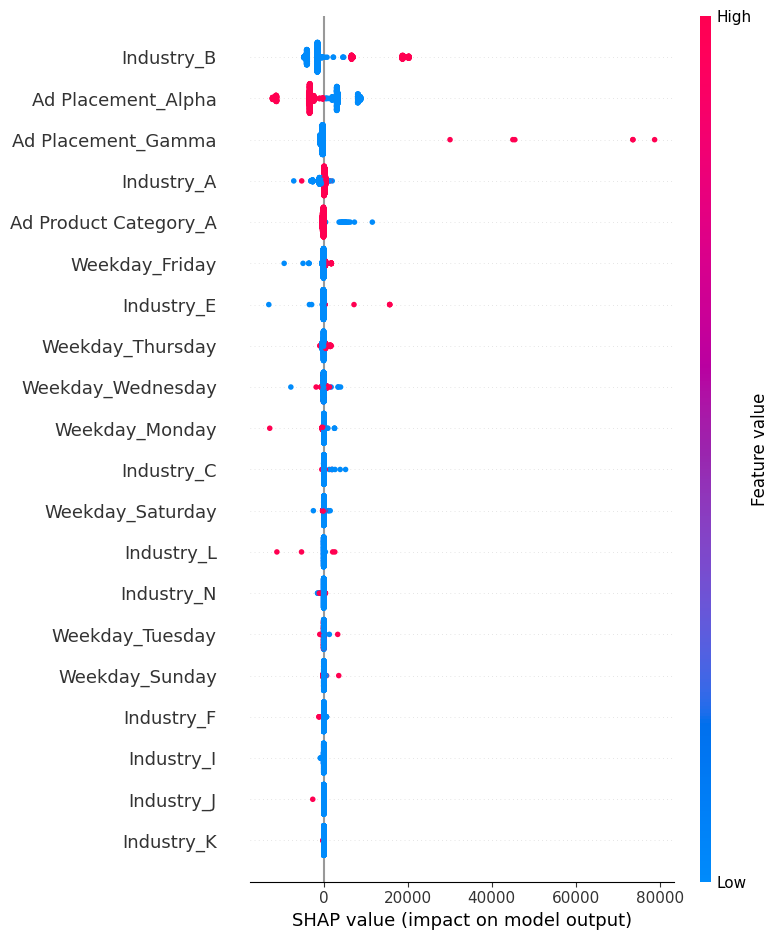

In [ ]:
# Create a SHAP explainer object
# For tree-based models like RandomForestRegressor, TreeExplainer is efficient
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for a sample of the training data
# It's often computationally expensive to calculate SHAP values for the entire dataset
# Using a smaller sample (e.g., 1000 rows) is common practice
sample_size = 1000
X_sample = shap.sample(X_train, sample_size)

# Calculate SHAP values
shap_values = explainer.shap_values(X_sample)

# Get the feature names from the encoder
feature_names_shap = encoder.get_feature_names_out(features)

# Summarize the SHAP values using a summary plot
# This plot shows the overall importance of each feature
shap.summary_plot(shap_values, X_sample, feature_names=feature_names_shap, show=False)
# Display the plot
import matplotlib.pyplot as plt
plt.show()

In [ ]:
# Choose a specific instance to explain (e.g., the first instance in the sample)
shap.initjs() # Initialize JavaScript for interactive plots if not already done
shap.force_plot(explainer.expected_value, shap_values[0,:], X_sample[0,:], feature_names=feature_names_shap)

# 6. ydata_profiling (extra)

In [ ]:
!pip install ydata-profiling > /dev/null

import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:03<00:00,  3.12it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]